In [250]:
import matplotlib.pyplot as plt
import matplotlib
import mpld3
import numpy as np
import pandas as pd
from sympy import Eq, Symbol, solve

%matplotlib inline

In [251]:
import astropy.units as u
from astropy.constants import G, c, M_jup, M_sun, m_e, k_B, h, N_A, m_p, hbar, eps0

## Number 3b

In [18]:
ns=[1.0,1.5,2.0,2.5,3.0,3.5]

def f(x,n):
    return 1.-1/6.*x**2+n/120.*x**4.

print f(0.5,n[1])

0.959114583333


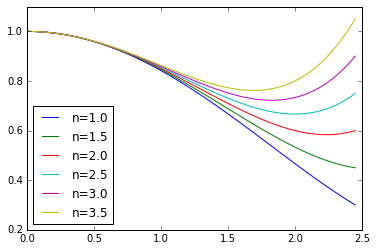

In [105]:
x=np.arange(0,2.5,0.05)
for n in ns:
    plt.plot(x,[f(y,n) for y in x],label="n="+str(n))
    
plt.legend(loc='best')

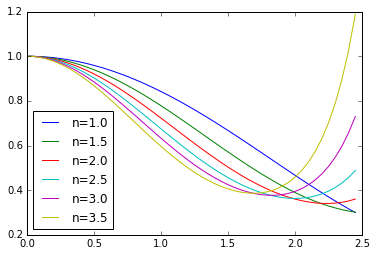

In [31]:
x=np.arange(0,2.5,0.05)
for n in ns:
    plt.plot(x,[f(y,n)**n for y in x],label="n="+str(n))
    
plt.legend(loc='best')

## Constants

In [107]:
p_c=158*u.g/u.cm**3
T_c=15.7e6*u.K
X=0.6

In [102]:
n=[1,1.5,2,3,3.5]
z1=[3.14159,3.6536,4.35287,6.89684,9.4001]
dzdx1=[-0.318311,-0.203319,-0.127249,-0.0424299,-0.0213961]

## For the sun

In [142]:
lamda=((4*K*p_c**(-2/3.))/(4*np.pi*G))**0.5
print lamda.decompose()
#M=4*np.pi*p_c*z1[2]**2*np.abs(dzdx1[2])*lamda**3.
#print M.decompose()
#R=lamda*z1[2]
#print R.decompose()

989.525744889 m


In [106]:
k=[6.74135e-6,6.70447e-6,6.32967e-6,4.76492e-6,3.72917e-6]
Omega=[0.000327677,0.000419637 ,0.000469836,0.000385717,0.000265993]

In [313]:
R=np.sqrt( 4./(4.*np.pi*G)*k_B*T_c/(0.62*m_p*p_c)).to(u.solRad)*6.89684
R

<Quantity 0.7876864304681619 solRad>

In [316]:
(4.*np.pi*R**2.*np.sqrt(4./(4.*np.pi*G)*k_B*T_c*p_c/(0.62*m_p))*0.0424299).decompose().to(u.solMass)

<Quantity 1.0097146836271726 solMass>

## Number 3d

In [317]:
lamda=np.sqrt( 4./(4.*np.pi*G)*k_B*T_c/(0.62*m_p*p_c))

In [318]:
lamda.decompose().to(u.solRad)

<Quantity 0.11420975844998026 solRad>

In [153]:
np.array([1,2,3,4,5,6])*0.127

array([ 0.127,  0.254,  0.381,  0.508,  0.635,  0.762])

In [326]:
4.*np.pi*2.46e6*0.6*(0.114*u.solRad)**3*p_c**2

<Quantity 686001316.9241729 g2 solRad3 / cm6>

In [158]:
p_c

<Quantity 158.0 g / cm3>

In [328]:
(2.46e6*(158)**2*0.6**2*(15.7)**(-2/3.)*4*np.pi*1.224e-38*(u.erg/u.s/u.cm**3)*(0.114*u.solRad)**3.).decompose().to(u.erg/u.s)/(3.839e33*u.erg/u.s)

<Quantity 7.041731474429372e-32>

In [320]:
(2.46e6*(158)**2*0.6**2*(15.7)**(-2/3.)*4*np.pi*1.224e-38*(u.erg/u.s/u.cm**3)*(0.114*u.solRad)**3.).decompose().to(u.erg/u.s)

<Quantity 270.3320713033436 erg / s>

In [333]:
(4.*np.pi*2.46e6*0.6**2*158**2*15.7**(-2./3.)*(u.erg/u.s/u.cm**3)*(0.114*u.solRad)**3).decompose().to(u.erg/u.s)*(9.27787e-8)/(3.839e33*u.erg/u.s)

<Quantity 0.5337603692374511>

In [176]:
u.solLum.to(u.erg/u.s)

3.8459999999999994e+33

## Number 7

In [209]:
((3./4.**(1./3.))*(q_e**(4./3.)/hbar**(2./3.))*2**(1./3)/(k_B*1e6*u.K)**(1./3.)).decompose()

<Quantity 3869.42650976472 A(4/3) s(8/3) / (kg m2)>

In [205]:
q_e**(4./3.)/hbar**(2./3.)

<Quantity 0.0038984899574358513 C(4/3) / (J(2/3) s(2/3))>

In [203]:
q_e=1.60217657e-19*u.C

In [204]:
q_e

<Quantity 1.60217657e-19 C>

In [222]:
((1./(4*np.pi*eps0)*q_e**2/hbar)/(1*u.J**0.5)).decompose()

<Quantity 2187691.2793164584 1 / kg(1/2)>

In [262]:
(2**(1./3.)*3./4.**(1./3.)*m_p**(1./3)*((1./(4*np.pi*eps0)*q_e**2/hbar/(k_B*1e6*u.K)**0.5)**(2./3))).decompose()

<Quantity 19.855162948003905>

In [226]:
1*u.kg.to(u.u)

6.022141290116741e+26

In [230]:
(42.6/19.8)

2.1515151515151514

In [234]:
2**(1./3.)*3./4.**(1./3.)

2.3811015779522995

## Number 3c

In [243]:
#def f(x,t):
#    return -x**3+np.sin(t)

def f(a1, a2, t):
    return -2.*a1+12.*a2*t**2

def u(a1, a2, t):
    return -2*a1*t+4*a2*t**3

def phi(a0, a1, a2, t):
    return a0-a1*t**2+a2*t**4

f(x,t)=-2.*u(x,t)/t-phi(x,t)

n=1.
a0=1              
a1=1./6.
a2=n/120.

N=20
h=0.1

tpoints = np.arange(0,6,h)
xpoints = []
x=0.0

for t in tpoints:
    xpoints.append(x)
    k1 = h*f(x,t)
    k2 = h*f(x+0.5*k1, t+0.5*h)
    k3 = h*f(x+0.5*k2, t+0.5*h)
    k4 = h*f(x+k3, t+h)
    x += (k1+2*k2+2*k3+k4)/6.

TypeError: f() takes exactly 3 arguments (2 given)

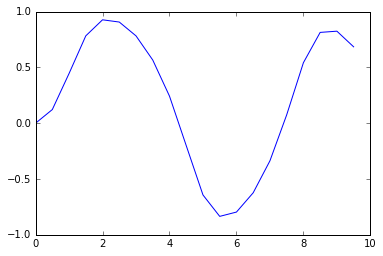

In [240]:
plt.plot(tpoints,xpoints)

In [273]:
r_p=1.e-15*u.m
np.sqrt(0.5/(4*np.pi*eps0)*q_e**2/(2*r_p*m_p)).decompose()/(3e8*u.m/u.s)


<Quantity 0.01957406181619376>

In [287]:
((m_p/(k_B*15.7e6*u.K))**0.5*(0.02*c)).decompose()

<Quantity 16.655517685123666>

In [283]:
1/np.sqrt(2*np.pi)*np.sqrt(277)*np.e**(-277)

3.3310293794261514e-120

In [282]:
np.e

2.718281828459045

In [303]:
2/np.sqrt(np.pi)*11.777*np.e**(-(11.777**2))

7.7238063584349562e-60

In [289]:
m_p

<Constant name=u'Proton mass' value=1.672621777e-27 uncertainty=7.4e-35 unit='kg' reference=u'CODATA 2010'>

In [302]:
(np.sqrt(m_p/(2*k_B*15.7e6*u.K))*(0.02*c)).decompose()

<Quantity 11.777229499323411>

In [301]:
(1*u.solMass/m_p).decompose()*7.72e-60

<Quantity 0.009180707922828867>